# Exploracion de datos de ataques terroristas

Hoy exploraremos el 'Global Terrorism Database'(GDT) que contiene informacion de mas de 180.000 ataques terroristas.

El GDT es una base de datos open-source que incluye información sobre ataques terroristas en todo el mundo desde 1970 hasta 2017. El GTD incluye datos sistemáticos sobre incidentes terroristas internacionales que ocurrieron durante este período de tiempo. La base de datos es mantenida por investigadores del Consorcio Nacional para el Estudio del Terrorismo y las Respuestas al Terrorismo (START), con sede en la Universidad de Maryland, EEUU.

Definición de terrorismo:

"Forma violenta de lucha política, mediante la cual se persigue la destrucción del orden establecido o la creación de un clima de terror e inseguridad susceptible de intimidar a los adversarios o a la población en general."

#### Definicion de columnas del dataset:

iyear : Este campo contiene el año en que ocurrió el incidente. En el caso de incidentes que ocurran durante un período prolongado, el campo registrará el año en que se inició el incidente.

country_txt : Este campo identifica el país o la ubicación donde ocurrió el incidente.

region_txt : Este campo identifica la región en la que ocurrió el incidente.

city : Este campo identifica la ciudad en la que ocurrió el incidente. 

success(éxito) : El éxito de un ataque terrorista se define de acuerdo con los efectos tangibles del ataque. El éxito no se juzga en términos de los objetivos más grandes de los perpetradores. Por ejemplo, una bomba que explotó en un edificio se consideraría un éxito incluso si no lograra derribar el edificio o inducir la represión del gobierno.
La definición de un ataque exitoso depende del tipo de ataque. Esencialmente, la pregunta clave es si el tipo de ataque tuvo lugar o no. Si un caso tiene múltiples tipos de ataque, tiene éxito si alguno de los tipos de ataque tiene éxito, con la excepción de los asesinatos, que solo tienen éxito si se mata al objetivo deseado.

attacktype1_txt : Este campo captura el método general de ataque y a menudo refleja la amplia clase de tácticas utilizadas.

targtype1_txt : El campo de tipo objetivo / víctima captura el tipo general de objetivo / víctima.

gname : Este campo contiene el nombre del grupo que llevó a cabo el ataque.

weaptype1_txt : Este campo registra el tipo general de arma utilizada en el incidente.

weapsubtype1_txt : Este campo registra un valor más específico para la mayoría de los tipos de armas identificados inmediatamente arriba.

nkill : Este campo almacena el número total de muertes confirmadas por el incidente. El número incluye a todas las víctimas y atacantes que murieron como resultado directo del incidente.

ishostkid : Este campo registra si las víctimas fueron tomadas como rehenes.





### Importando librerias y dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
terr = pd.read_csv(r'C:\Users\Usuario\Desktop\Python\terrorists_EDA\globalterrorism.csv', encoding = 'latin1');

## Recategorizacion de algunas de las columnas.

Ejemplo: Columna de ataques de terrorista la paso de ser un objeto a una categoria.

In [76]:
columnas_ret = ['iyear','country_txt','region_txt','city','success','attacktype1_txt','targtype1_txt','gname','weaptype1_txt',
               'weapsubtype1_txt','nkill','ishostkid','nhostkid','ransom','ransomamt','ransompaid']

In [77]:
terror = terr[terr.columns[terr.columns.isin(columnas_ret)]]

In [78]:
terror.shape;

In [79]:
terror.head();

In [80]:
terror.dtypes;

In [81]:
terror.loc[:,'success'] = terror.loc[:,'success'].astype('category');

In [82]:
terror.loc[:,'success'];

In [83]:
terror.loc[:,'attacktype1_txt'] = terror.loc[:,'attacktype1_txt'].astype('category') 
terror.loc[:,'targtype1_txt'] = terror.loc[:,'targtype1_txt'].astype('category') 
terror.loc[:,'weaptype1_txt'] = terror.loc[:,'weaptype1_txt'].astype('category')
terror.loc[:,'weapsubtype1_txt'] = terror.loc[:,'weapsubtype1_txt'].astype('category') 
terror.loc[:,'ishostkid'] = terror.loc[:,'ishostkid'].astype('category')
terror.loc[:,'ransom'] = terror.loc[:,'ransom'].astype('category')

In [84]:
terror['weapsubtype1_txt'].unique();

### Tratamiento missing data

In [85]:
terror.apply(lambda x: sum(pd.isna(x)));

In [86]:
terror = pd.DataFrame(terror)

In [87]:
terror['weapsubtype1_txt'] = terror['weapsubtype1_txt'].cat.add_categories('Unknown')

In [88]:
terror.loc[terror['weapsubtype1_txt'].isna(),'weapsubtype1_txt'] = 'Unknown'

In [89]:
terror[terror['nkill'].isna()]; #por ahora, ignorar.
#Prefiero saltar los NA en mis calculos que borrarlos dado a que son muchos.

In [90]:
terror['ishostkid'].value_counts();

In [91]:
terror['ishostkid'].isna().sum();

In [92]:
#Borrar pocas observaciones en ishostkid (columna que me dice si hubo o no un rehén)
terror = terror[terror['ishostkid'].notna()]

#### Hay columnas que resultan tener mucha informacion nula, que no nos aporta en nuestro estudio. Como observan abajo en la tabla y el grafico, las columnas que nos otorgan informacion sobre si se pidio dinero de rescate (ransom) y cuanto se termino pagando(ransompaid), contiene en su mayoria datos nulos(en algunos casos casi el 100% de los datos!). Estas columnas como las otras que observamos abajo con grandes numeros de informacion nula seria eliminadas ya que no es posible realizar algun tipo de analisis. 

In [93]:
##Eliminar variables cuyas observaciones resultan tener mas NA que cualquier otra observacion
(terror.apply(lambda x: sum(pd.isna(x))))/len(terror.index)

iyear               0.000000
country_txt         0.000000
region_txt          0.000000
city                0.002391
success             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
gname               0.000000
weaptype1_txt       0.000000
weapsubtype1_txt    0.000000
nkill               0.056729
ishostkid           0.000000
nhostkid            0.925228
ransom              0.573689
ransomamt           0.992563
ransompaid          0.995736
dtype: float64

In [94]:
na_mayor = pd.DataFrame((terror.apply(lambda x: sum(pd.isna(x))))/len(terror.index))

In [95]:
na_mayor.columns = ['% de NA']

Eliminar nhostkid,ransom,ransomamt,ransompaid


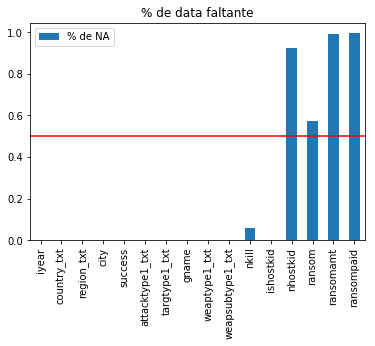

In [96]:
na_mayor.plot(kind = 'bar', title = '% de data faltante')
plt.axhline(y = 0.5,color = 'red')
print('Eliminar nhostkid,ransom,ransomamt,ransompaid')

In [97]:
terror = terror.drop(['nhostkid','ransom','ransomamt','ransompaid'], axis = 1)

## Data Wrangling. Un poco de ultimos ajustes al dataset original para poder comenzar con el analisis

In [98]:
terror.head();

In [99]:
terror_country = pd.DataFrame(terror.groupby('country_txt').size())

In [100]:
terror_country.head();

In [101]:
terror_country.shape;

In [102]:
terror_country.index.name = 'pais'

In [103]:
terror_country.columns = ['ataques']

In [104]:
isinstance(terror_country, pd.DataFrame);

In [105]:
(terror_country['ataques'].mean());

In [106]:
terror_country['ataques'].median();

## Paises con ataques mayores al promedio mundial

             ataques
pais                
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306


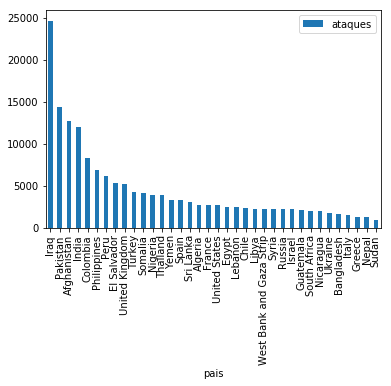

In [107]:
(terror_country[terror_country['ataques'] > (terror_country['ataques'].mean())]).sort_values(by = 'ataques',ascending = False).plot(kind = 'bar')
print((terror_country[terror_country['ataques'] > (terror_country['ataques'].mean())]).sort_values(by = 'ataques',
                                                                                                   ascending = False).head())


#### En el grafico que observamos arriba, vemos los paises cuyos ataques acumulados desde 1970 superan el promedio mundial de 885 ataques.

## Ataques por region

region_txt
Middle East & North Africa     50474
South Asia                     44973
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12484
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3280
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
dtype: int64


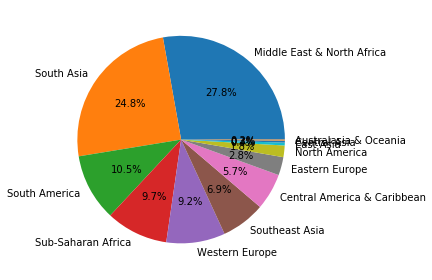

In [108]:
terror_region = terror.groupby('region_txt').size().sort_values(ascending = False)
print(terror_region)
labels = terror_region.index
plt.pie(terror_region,labels = labels,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

#### En el grafico superior, podemos observar como mas de la mitad de los ataques terroristas tienen origen en el continente Asiatico. Subsiguiente seria nuestro continente Americano, en el cual llega aproximadamente a un 17% de los ataques mundiales. A America le sigue el continente Europeo con aproximadamente un 12%, Africa con aproximadamente un 10%, y por ultimo el continente oceanico con un porcentaje casi nulo. 

## Ataques en Sudamérica, discriminado por pais

In [109]:
terror_sud = terror[terror['region_txt'] == 'South America']
terror_sud_group = pd.DataFrame(terror_sud.groupby('country_txt').size().sort_values(ascending = False))
terror_sud_group['prop %'] = round(terror_sud_group/terror_sud_group[0].sum() * 100,2)


In [110]:
terror_sud_group.columns = ['Ataques','proporcion']

In [111]:
import squarify

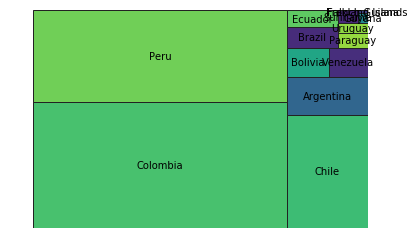

                  Ataques  proporcion
country_txt                          
Colombia             8306       43.77
Peru                 6096       32.12
Chile                2365       12.46
Argentina             815        4.29
Bolivia               314        1.65
Venezuela             293        1.54
Brazil                273        1.44
Ecuador               220        1.16
Paraguay              114        0.60
Uruguay                82        0.43
Suriname               66        0.35
Guyana                 26        0.14
French Guiana           7        0.04
Falkland Islands        1        0.01


In [112]:
#squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 ) 
labels_sud = terror_sud_group.index
squarify.plot(sizes=terror_sud_group.iloc[:,0], label= labels_sud, bar_kwargs=dict(linewidth=1, edgecolor="#222222")) 
plt.axis('off')
plt.show() 
print(terror_sud_group)

## Evolucion de ataques terroristas anuales

In [113]:
terror_evo = terror.groupby('iyear').size()

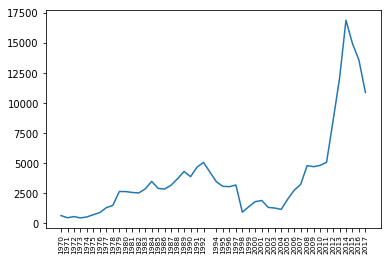

In [114]:
plt.plot(terror_evo)
plt.xticks(terror_evo.index)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.show()

#### Observemos el pico de ataques en los años 2013-2015, estudiaremos este pico en los siguientes graficos.

In [115]:
terror_group_spike = pd.DataFrame(terror.groupby(['iyear','region_txt']).size()).reset_index()

In [116]:
terror_group_spike.columns = ['Año','Region','Ataques']

In [117]:
terror_group_spike.head()

,Año,Region,Ataques
0,1970,Australasia & Oceania,1
1,1970,Central America & Caribbean,7
2,1970,East Asia,2
3,1970,Eastern Europe,12
4,1970,Middle East & North Africa,28


In [118]:
terror_spike = terror_group_spike[terror_group_spike['Año'] > 2010].set_index('Año')

In [119]:
terror_spike.Region.unique();

In [120]:
regiones = terror_spike.Region.unique()

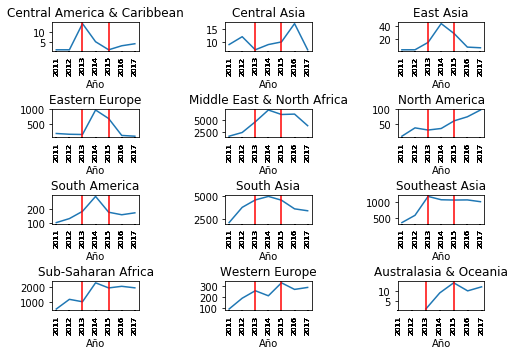

In [121]:
regiones_spike_plot = plt.figure()

for i,num in zip(regiones, range(1,13)):
    terror_spike_reg = terror_spike[terror_spike['Region']==i]
    ax = regiones_spike_plot.add_subplot(4,3,num)
    terror_spike_reg.plot(title=i, ax=ax, legend=False)
    plt.axvline(x = 2013,color = 'red')
    plt.axvline(x = 2015,color = 'red')
    plt.xticks(terror_spike.index, rotation = 90)
    plt.tick_params(axis='x',width = 2, length = 1,labelsize=7.5)

    
plt.subplots_adjust(left=2, bottom=2, right=3, top=3, wspace=1, hspace=2)
plt.show()






#### Como observamos en el grafico de la evolucion de ataques terroristas que hubo un pico de ataques entre 2013-2015, decidi graficar cada region para ver cuales fueron las que otorgaron en mayor parte a este subida importante de terrorismo global.

#### Vemos entonces entre las lineas rojas, que corresponen a los años 2013 y 2015, como las siguientes regiones sufrieron un numero elevado de ataques:

*Este Asiatico
*Este Europeo
*Medio oriente y el norte de Africa
*Sud America
*Sur Asiatico
*Sudeste Asiatico
*Africa Subsahariana
*Oceania

#### Importante aclaracion!! Si bien cada una de estas regiones vio un incremento en ataques, cada una tiene una escala diferente. Si bien los ataques en oceania duplicaron, nominalmente es un numero mucho menor a por ejemplo el salto en el Este Europeo o Africa Subsahariana. 

In [122]:
terror.iyear.mode()## 2014, año con mayor cantidad de ataques terroristas

0    2014
dtype: int64

## Cantidad de fallecidos

In [123]:
#top 3 attacks with most deaths

In [124]:
fatalities = pd.DataFrame(terror.groupby('nkill').size())

In [125]:
print(fatalities.head())
fatalities.shape

           0
nkill       
0.0    88011
1.0    36554
2.0    14147
3.0     7737
4.0     4961


(205, 1)

In [126]:
fatalities.columns = ['Frecuencia']
fatalities.index.name = 'Cantidad de fallecidos'

### En el siguiente grafico con escala logaritmica (dado a las grandes diferencias entre los valores), el eje X es la cantidad de muertos en ataques terroristas. Podemos observar como en la mayoria de los casos, la cantidad de fallecidos es 0. 

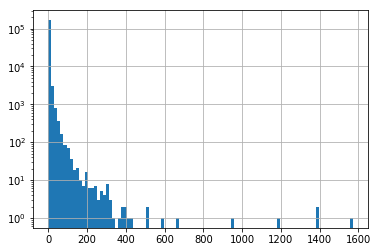

In [127]:
terror.nkill.hist( bins = 100, log = True)
plt.show()

In [128]:
print("Numero de fallecidos mas frecuente: 0")

Numero de fallecidos mas frecuente: 0


### Entonces, cuales son las estadisticas generales sobre la cantidad de fallecidos en ataques terroristas?

#### Como observamos en la tabla abajo y sin tener en cuenta los valores inexistentes, vemos que en promedio con redondeo, mueren 2 personas por cada ataque terrorista, con un envio estandar de 12 muertes por ataque. La cantidad de ataques sin fallecidos es tan grande que la mediana resulta ser 0. Hubo un ataque particularmente tragico que se llevo la vida de 1570 muertos. Mas detalles abajo.

In [129]:
terror.nkill.describe()

count    171216.000000
mean          2.405365
std          11.550985
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: nkill, dtype: float64

In [130]:
evo_fallecidos = terror.groupby('iyear')['nkill'].sum()

## Abajo observamos las evolucion de la cantidad de muertes a causa del terrorismo desde 1970. El grafico le suena familiar?

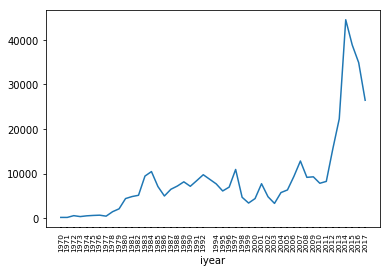

In [131]:
evo_fallecidos.plot()
plt.xticks(evo_fallecidos.index, rotation = 90)
plt.tick_params(axis='x',width = 2, length = 1,labelsize=7.5)

plt.show()

In [132]:
may_tragedias = pd.Series(terror.nkill.sort_values(ascending = False).head())

### En la tabla abajo, puede observar informacion sobre los peores ataques terroristas desde 1970. 2 Corresponden al grupo ISIS, 2 a Al-Qaida y uno a los Hutu de Rwanda. 

In [133]:
terror[terror['nkill'].isin(may_tragedias)].sort_values(by = 'nkill',ascending = False)

,iyear,country_txt,region_txt,city,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,weapsubtype1_txt,nkill,ishostkid
133518,2014,Iraq,Middle East & North Africa,Tikrit,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),Firearms,Unknown Gun Type,1570.0,1.0
73126,2001,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,Unknown,1384.0,1.0
73127,2001,United States,North America,New York City,1,Hijacking,Private Citizens & Property,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,Unknown,1383.0,1.0
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,1,Armed Assault,Private Citizens & Property,Hutu extremists,Firearms,Automatic or Semi-Automatic Rifle,1180.0,0.0
136283,2014,Iraq,Middle East & North Africa,Sinjar,1,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,953.0,1.0


## Midiendo el 'exito' de los ataques

In [134]:
#which attacks were more successful?

In [135]:
terror.success.astype(int).sum()/len(terror.success);

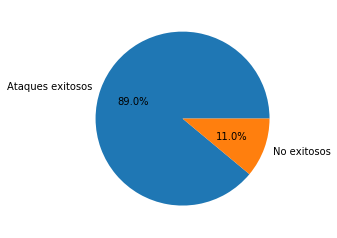

Ataques en total:181513
1    161474
0     20039
Name: success, dtype: int64


In [136]:
plt.pie(pd.DataFrame(terror.success.value_counts()), labels = ['Ataques exitosos','No exitosos'],autopct='%1.1f%%')
plt.show()

print('Ataques en total:{}'.format(len(terror.success)))
print(terror.success.value_counts())

### En el grafico arriba podemos observar que hasta 11% (20.039 ataques) de los ataques terroristas llevado a cabo no tuvieron éxito.

In [137]:
terror.success = terror.success.astype(int)

In [138]:
prom_exito_anual = pd.DataFrame(terror.groupby('iyear')['success'].mean())

In [139]:
suma_exito_anual = pd.DataFrame(terror.groupby('iyear')['success'].sum())

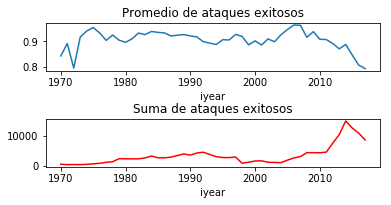

In [140]:
suc_plot = plt.figure()
first_plot = suc_plot.add_subplot(2,1,1)
prom_exito_anual.plot(ax = first_plot,title = 'Promedio de ataques exitosos',legend = False)


second_plot = suc_plot.add_subplot(2,1,2)
suma_exito_anual.plot(ax = second_plot, title = 'Suma de ataques exitosos', color = 'red',legend = False)

plt.subplots_adjust(bottom=0.5, top=1, wspace=1, hspace=1)
plt.show()



### El objetivo del grafico superior es analizar la relacion entre la SUMA de ataques exitosos a travez de los años, con el PROMEDIO de los ataques exitosos. Podemos entonces observar que a partir de 2010, nominalmente subieron los ataques terroristas, pero el la probabilidad de que estos ataques terroristas tengan exito, bajaron casi un 10%. 

### En la tabla y grafico de abajo, observamos el TIPO DE ATAQUE de terroristas mas utilizados, explosiones con bombas siendo la mas frecuente.

Bombing/Explosion                      88140
Armed Assault                          42637
Assassination                          19308
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10330
Unknown                                 7276
Unarmed Assault                         1014
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


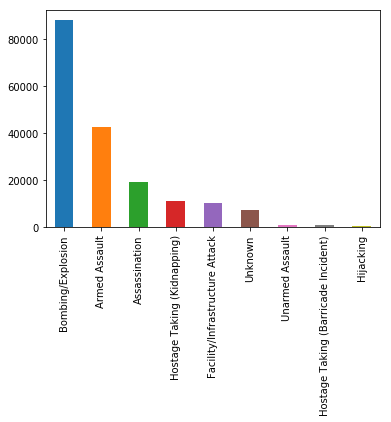

In [141]:
print(terror.attacktype1_txt.value_counts())
terror.attacktype1_txt.value_counts().plot(kind = 'bar')
plt.show()


In [142]:
most_suc_att = terror.groupby('attacktype1_txt')['success'].mean().sort_values()

### En este ultimo grafico, se demuestra cual tipo de ataque terrorista tiene mas chances de lamentablemente ser un ataque exitoso. 

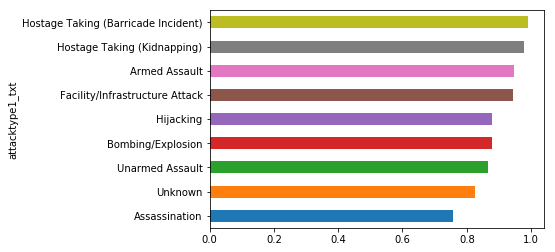

In [143]:
most_suc_att.plot(kind = 'barh')
plt.show()